# San Francisco's Southern is the most criminal district in the city - by far!

In [13]:
# Let's get some stuff to work with
import pandas as pd
import numpy as np
#import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
webpath = 'https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv'
# Load the data:
df = pd.read_csv(webpath)

Let's look at the data:

In [4]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


We observe that there are rows in the set that are not associated with crime. So let's remove those. While we are at it we will also pop some of the columns that we will not be working with this time around.

In [6]:
df = df[df['Category']!='NON-CRIMINAL']
df.pop('IncidntNum')
df.pop('Descript')
df.pop('Address')
df.pop('X')
df.pop('Y')
df.pop('Location')

0        (37.7383221869053, -122.405646994567)
2        (37.7800356268394, -122.409795194505)
3        (37.7725176473142, -122.485262988324)
5         (37.773907074489, -122.416578493475)
6         (37.773907074489, -122.416578493475)
7         (37.773907074489, -122.416578493475)
8        (37.7466488718366, -122.424497944857)
9        (37.7923158747647, -122.410845624227)
10       (37.7872932910877, -122.415821891164)
11       (37.8056654684523, -122.412782236976)
13        (37.7480144418715, -122.42249041028)
14       (37.7466488718366, -122.424497944857)
15       (37.7564864109309, -122.406539115148)
16       (37.8080574789267, -122.416629414907)
17       (37.8080574789267, -122.416629414907)
18       (37.7740418385041, -122.414370627495)
20       (37.7485319183987, -122.413765068125)
21       (37.7485319183987, -122.413765068125)
22       (37.7972972029479, -122.403678112414)
23        (37.7706305910776, -122.41248326348)
24       (37.7898297669592, -122.418844748098)
25       (37.

Next we will do data manipulation to obtain a number of new data frames that will make our life a little easier. 

In [7]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
#df['DateDay'] = df['Date'] + ' ' + df['DayOfWeek']

Let's do a heatmap, which how many criminal offenses were reported in total for every hour and every day (should make sense when you look at the map).

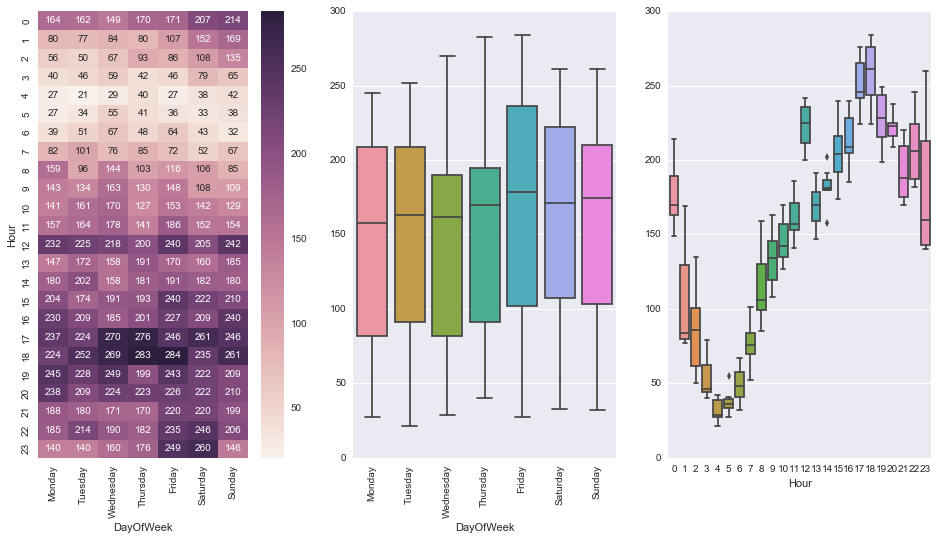

In [20]:
df_new = pd.crosstab(index=df['Hour'], columns=df['DayOfWeek'], values=df['Category'], aggfunc=len)
df_new = df_new[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(131)
sns.heatmap(df_new, annot=True, fmt='d')
plt.subplot(132)
bplot = sns.boxplot(df_new)
for item in bplot.get_xticklabels():
    item.set_rotation(90)
plt.subplot(133)
sns.boxplot(df_new.T)
#sns.heatmap(df_new, annot=True, fmt='d', ax=ax)
# sns.plt.show()

The color/annotation of the heatmap tells us that there is a peak in crime around noon after which it tapers off, only to resurge in the hours around 4-8 pm. On fridays and saturdays it continues till around midnight. The boxplot in the middle gives a feeling of the day-to-day difference. We observe that there is some difference to the means, but we would have to run an analysis like ANOVA to be able to ascertain whether there is a significant difference, and that is beyond the scope of this assignment. Finally, on the right we have a boxplot of the hours. Here it is quite clear that there is a difference between the number of crimes commited. There is less crime during early hours of the morning, which can most likely be attributed to the number of people (and criminals) on the streets being less. 
Next let's look at which districts we would want to stay away from and when.

In [23]:
df_dist =  pd.crosstab(index=df['PdDistrict'], columns=df['DayOfWeek'], values=df['Category'],aggfunc=len)
df_dist = df_dist[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

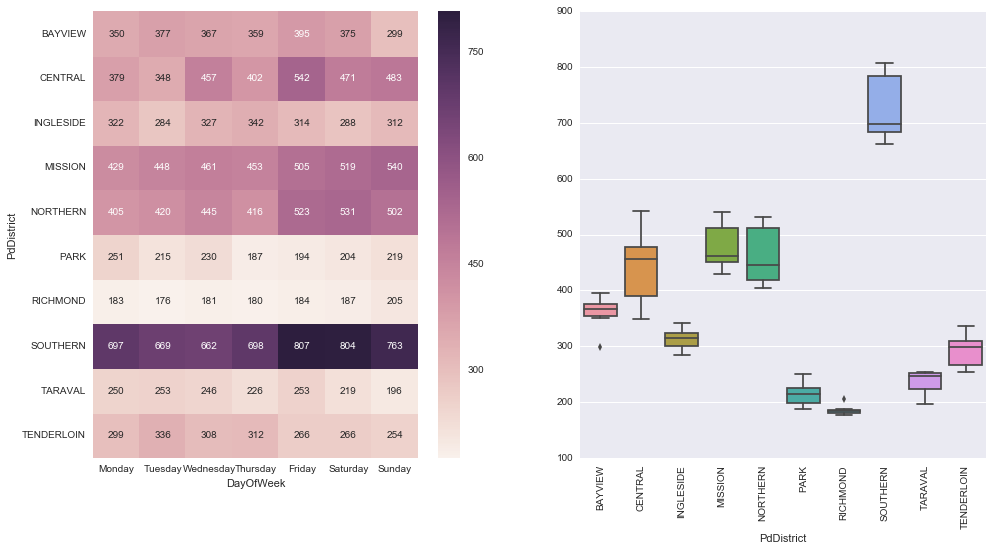

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(121)
sns.heatmap(df_dist, annot=True, fmt='d')
plt.subplot(122)
bplot = sns.boxplot(df_dist.T)
for item in bplot.get_xticklabels():
    item.set_rotation(90)

From the heatmap we see that any day of the week the Southern district seems to stand out from the rest. This is also corroborated by the boxplot. So knowing that, let's see what the good people of the Southern district get up to during the week.

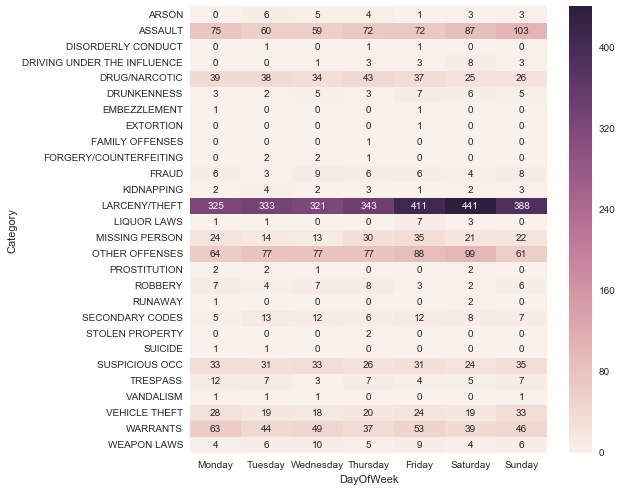

In [29]:
df_south =  pd.crosstab(index=df[df['PdDistrict']=='SOUTHERN']['Category'], columns=df['DayOfWeek'], values=df['Category'],aggfunc=len).fillna(0)
df_south = df_south[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
df_south = df_south.astype(int)
plt.figure(figsize=(8,8))
sns.heatmap(df_south, annot=True, fmt='d')

It would seem that larceny/theft and assault are their main modes of spending their time (and other offenses). So the lesson here must be stay away from the Southern district basically every day of the week. 